In [53]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, classification_report, recall_score, accuracy_score, roc_curve, auc 
from sklearn.model_selection import train_test_split,GridSearchCV
import xgboost as xgb 


In [2]:
df= pd.read_csv(r'D:\Machine Learning\projects\Heart Desease Prediction\Data\heart.csv')

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
## drop faulty data
df=df[df['ca']<4]
df=df[df['thal']>0]
print(f'The length of tha data now is {len(df)} instead of 303')

The length of tha data now is 296 instead of 303


In [7]:
## rename columns for clarity
df=df.rename(
columns={ 'cp':'chest_pain_type',
         'trestbps':'resting_blood_pressure',
         'chol':'cholestrol',
         'fbs':'fasting_blood_sugar',
         'restecg':'resting_elctrocardiogram',
         'thalach':'max_heart_rate_achieved',
         'exang':'exercise_induced_angina',
         'oldpeak':'st_depression',
         'slope':'st_slope',
         'ca':'major_vessels_num',
         'thal':'thalassemia'
}, errors='raise')

In [8]:
## Label Encoding
df['sex'][df['sex']==0]='female'
df['sex'][df['sex']==1]='male'
df['sex']

0        male
1        male
2      female
3        male
4      female
        ...  
298    female
299      male
300      male
301      male
302    female
Name: sex, Length: 296, dtype: object

In [9]:
df['chest_pain_type'][df['chest_pain_type']==0]='typical angina'
df['chest_pain_type'][df['chest_pain_type']==1]='atypical angina'
df['chest_pain_type'][df['chest_pain_type']==2]='non anginal pain'
df['chest_pain_type'][df['chest_pain_type']==3]='asymptomatic'
df['chest_pain_type']



0          asymptomatic
1      non anginal pain
2       atypical angina
3       atypical angina
4        typical angina
             ...       
298      typical angina
299        asymptomatic
300      typical angina
301      typical angina
302     atypical angina
Name: chest_pain_type, Length: 296, dtype: object

In [10]:
df['fasting_blood_sugar'][df['fasting_blood_sugar']==0]='lower than 120 gm/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar']==1]='greater than 120 gm/ml'

df['resting_elctrocardiogram'][df['resting_elctrocardiogram']==0]='normal'
df['resting_elctrocardiogram'][df['resting_elctrocardiogram']==1]='ST-T wave abnormality'
df['resting_elctrocardiogram'][df['resting_elctrocardiogram']==2]='left vertical hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina']==0]='no'
df['exercise_induced_angina'][df['exercise_induced_angina']==1]='yes'


df['st_slope'][df['st_slope'] == 0] = 'upsloping'
df['st_slope'][df['st_slope'] == 1] = 'flat'
df['st_slope'][df['st_slope'] == 2] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 1] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 2] = 'normal'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'

In [11]:
df.dtypes

age                           int64
sex                          object
chest_pain_type              object
resting_blood_pressure        int64
cholestrol                    int64
fasting_blood_sugar          object
resting_elctrocardiogram     object
max_heart_rate_achieved       int64
exercise_induced_angina      object
st_depression               float64
st_slope                     object
major_vessels_num             int64
thalassemia                  object
target                        int64
dtype: object

In [12]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,resting_elctrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,major_vessels_num,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120 gm/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non anginal pain,130,250,lower than 120 gm/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120 gm/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120 gm/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120 gm/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1


### Group features by data types

In [13]:
print(df.columns)

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestrol',
       'fasting_blood_sugar', 'resting_elctrocardiogram',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'major_vessels_num', 'thalassemia', 'target'],
      dtype='object')


In [14]:
num_feats = ['age', 'cholestrol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'major_vessels_num']
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
multi_feats= ['chest_pain_type', 'resting_elctrocardiogram', 'st_slope', 'thalassemia']
cat_feats = multi_feats + bin_feats

In [15]:
print(df.columns)

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestrol',
       'fasting_blood_sugar', 'resting_elctrocardiogram',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'major_vessels_num', 'thalassemia', 'target'],
      dtype='object')


## Exploratory Data Analysis

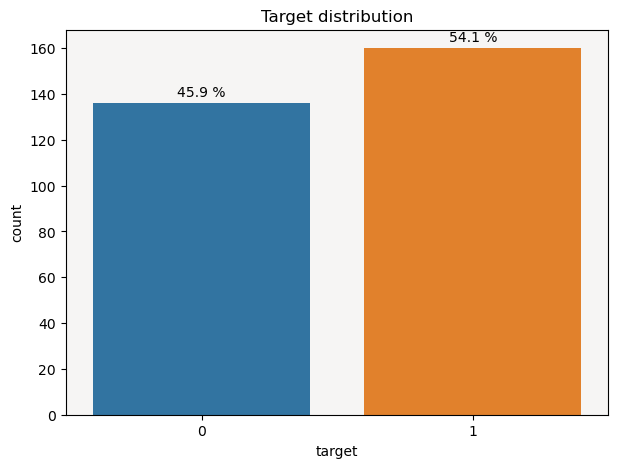

In [16]:
plt.figure(figsize=(7, 5)) 
total = float(len(df)) 
ax = sns.countplot(x=df['target'])
ax.set_facecolor('#F6F5F4')
ax.set_title('Target distribution')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center")

###### We observe that the target is fairly balanced with ~46% with no heart disease and ~54% with heart disease. So no need to worry about target imbalance.


In [17]:
df[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
cholestrol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
resting_blood_pressure,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
max_heart_rate_achieved,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
st_depression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2
major_vessels_num,296.0,0.679054,0.939726,0.0,0.0,0.0,1.00,3.0


## Numerical Features

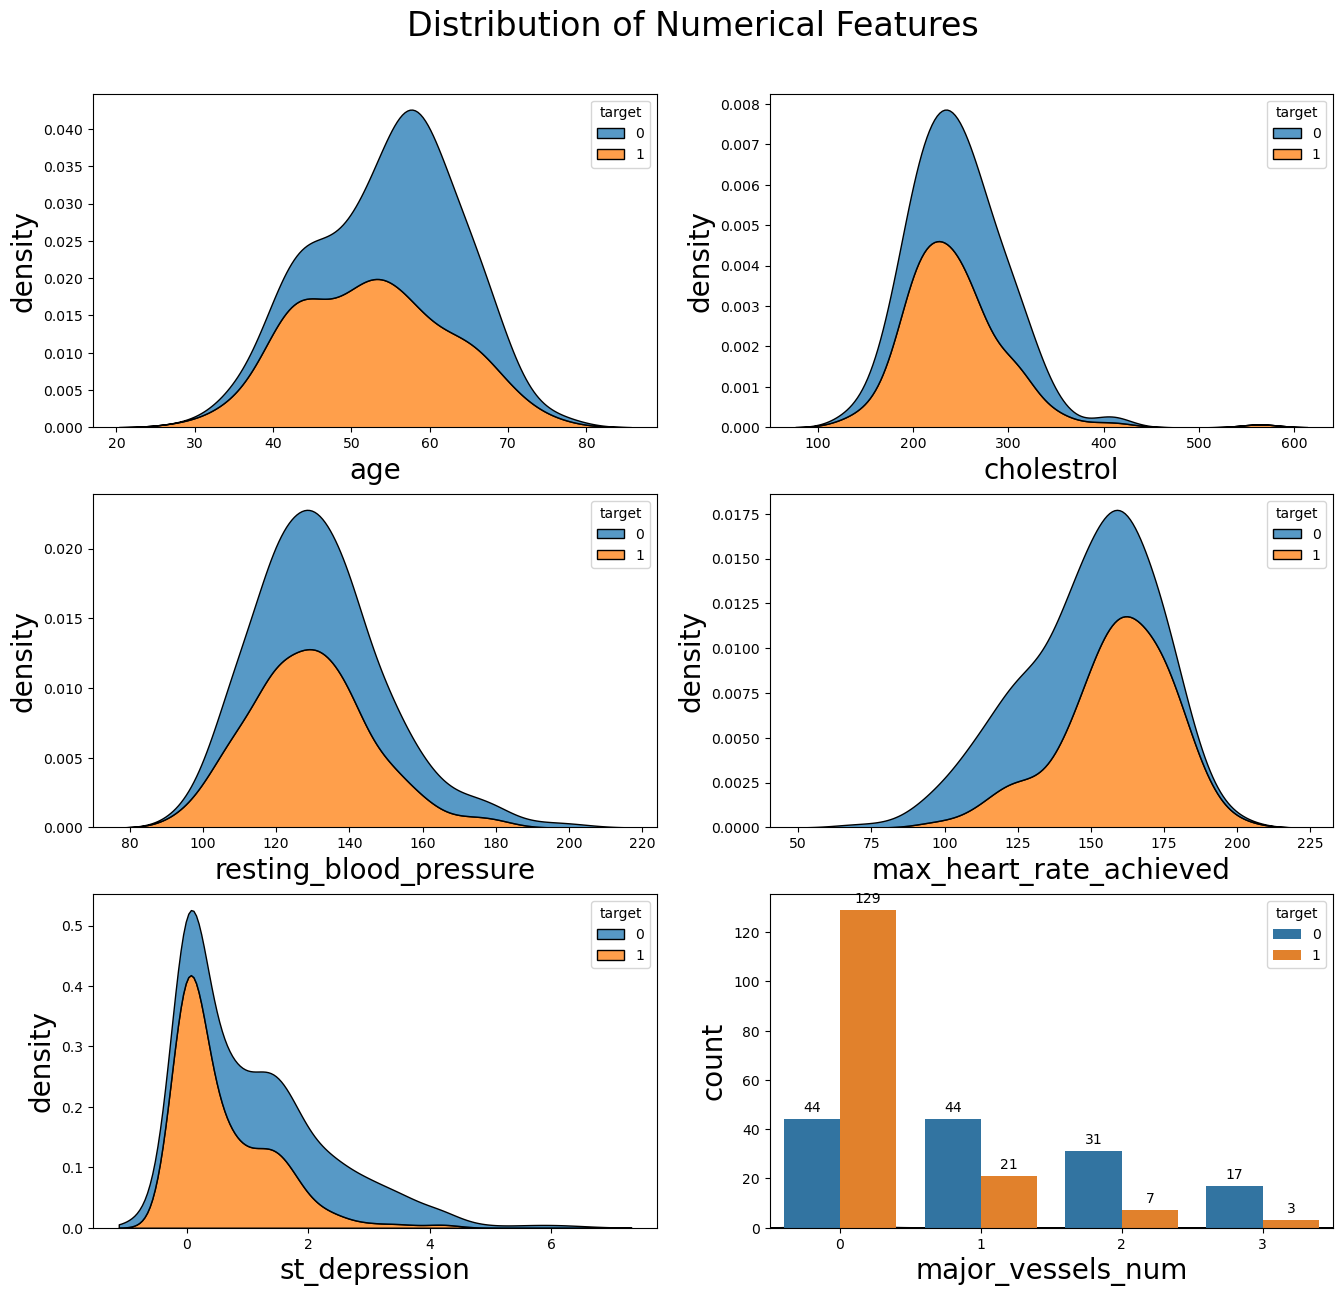

In [18]:
L=len(num_feats)
col=2
row=int(np.ceil(L/col))
fig, ax=plt.subplots(row, col, figsize=(16,14))
fig.subplots_adjust(top=0.92)
i=1;
for c in num_feats:
    plt.subplot(row, col,i)
    ax=sns.kdeplot(data=df, x=c, hue="target", multiple="stack")
    ax.set_xlabel(c, fontsize=20)
    ax.set_ylabel("density", fontsize=20)
 
    if c=='major_vessels_num':
        sns.countplot(data=df, x=c, hue="target")
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center")
    i+=1
plt.suptitle('Distribution of Numerical Features' ,fontsize = 24);    

<Figure size 2000x1600 with 0 Axes>

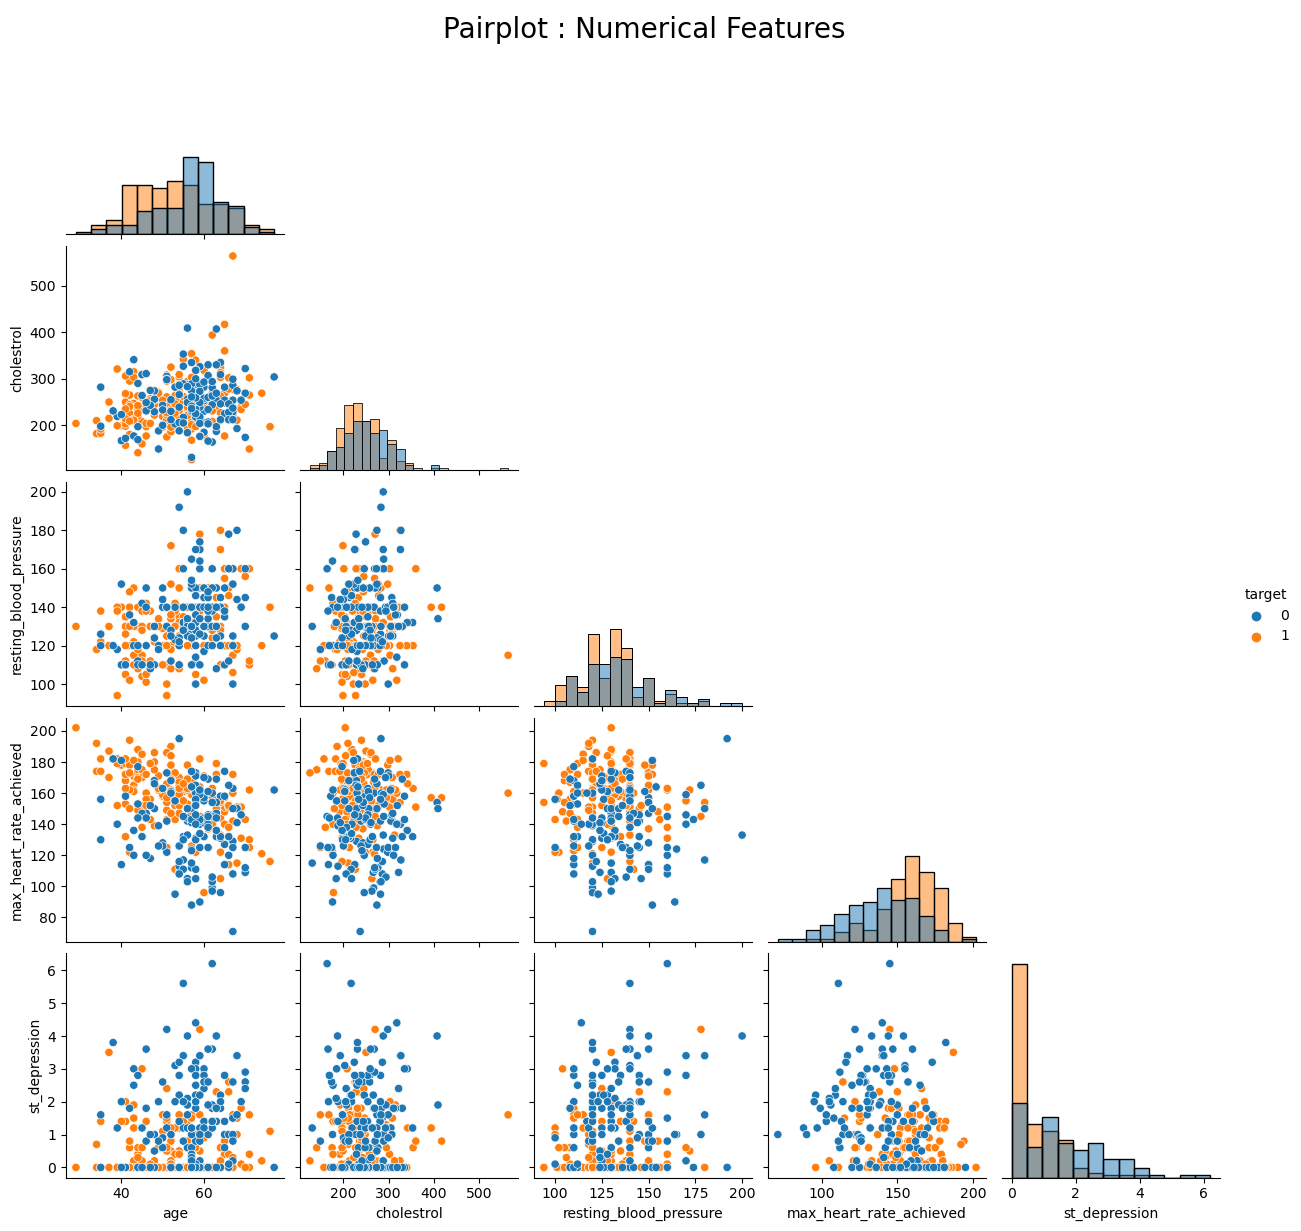

<Figure size 2000x1600 with 0 Axes>

In [19]:
_ = ['age', 'cholestrol', 'resting_blood_pressure','max_heart_rate_achieved', 'st_depression', 'target']
df_=df[_]
g=sns.pairplot(df_, hue="target", diag_kind="hist", corner=True)
plt.suptitle('Pairplot : Numerical Features', fontsize=20)
plt.figure(figsize=(20,16))

In [20]:
print(df.columns)

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestrol',
       'fasting_blood_sugar', 'resting_elctrocardiogram',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'major_vessels_num', 'thalassemia', 'target'],
      dtype='object')


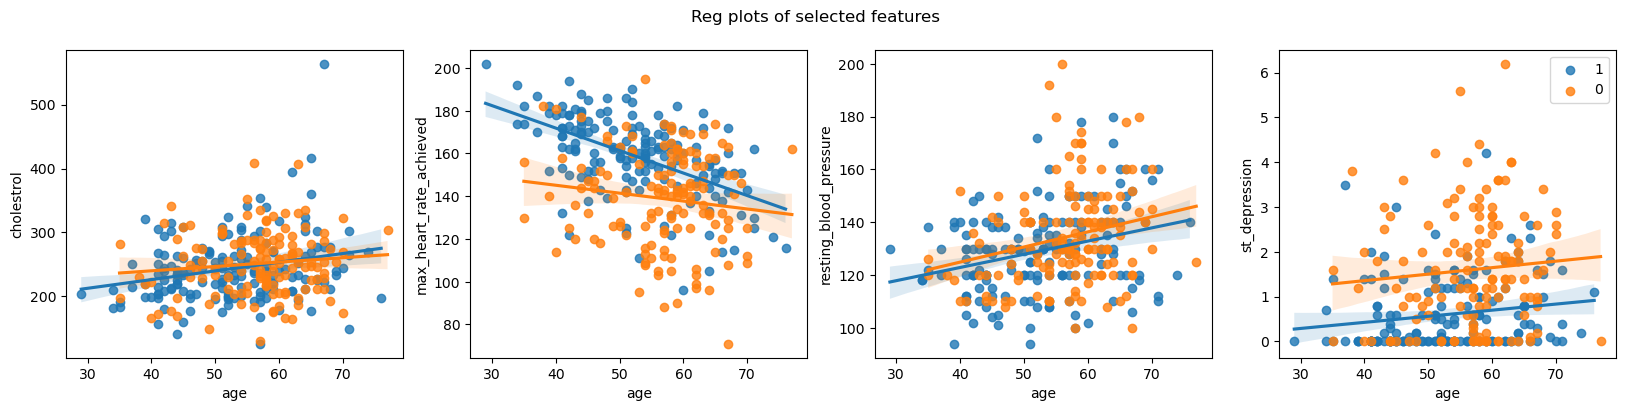

In [21]:
fig, ax = plt.subplots(1,4, figsize=(20, 4))
sns.regplot(data=df[df['target'] ==1], x='age', y='cholestrol', ax = ax[0], label='1')
sns.regplot(data=df[df['target'] ==0], x='age', y='cholestrol', ax = ax[0], label='0')
sns.regplot(data=df[df['target'] ==1], x='age', y='max_heart_rate_achieved', ax = ax[1], label='1')
sns.regplot(data=df[df['target'] ==0], x='age', y='max_heart_rate_achieved', ax = ax[1],  label='0')
sns.regplot(data=df[df['target'] ==1], x='age', y='resting_blood_pressure', ax = ax[2], label='1')
sns.regplot(data=df[df['target'] ==0], x='age', y='resting_blood_pressure', ax = ax[2],  label='0')
sns.regplot(data=df[df['target'] ==1], x='age', y='st_depression', ax = ax[3], label='1')
sns.regplot(data=df[df['target'] ==0], x='age', y='st_depression', ax = ax[3], label='0')
plt.suptitle('Reg plots of selected features')
plt.legend();

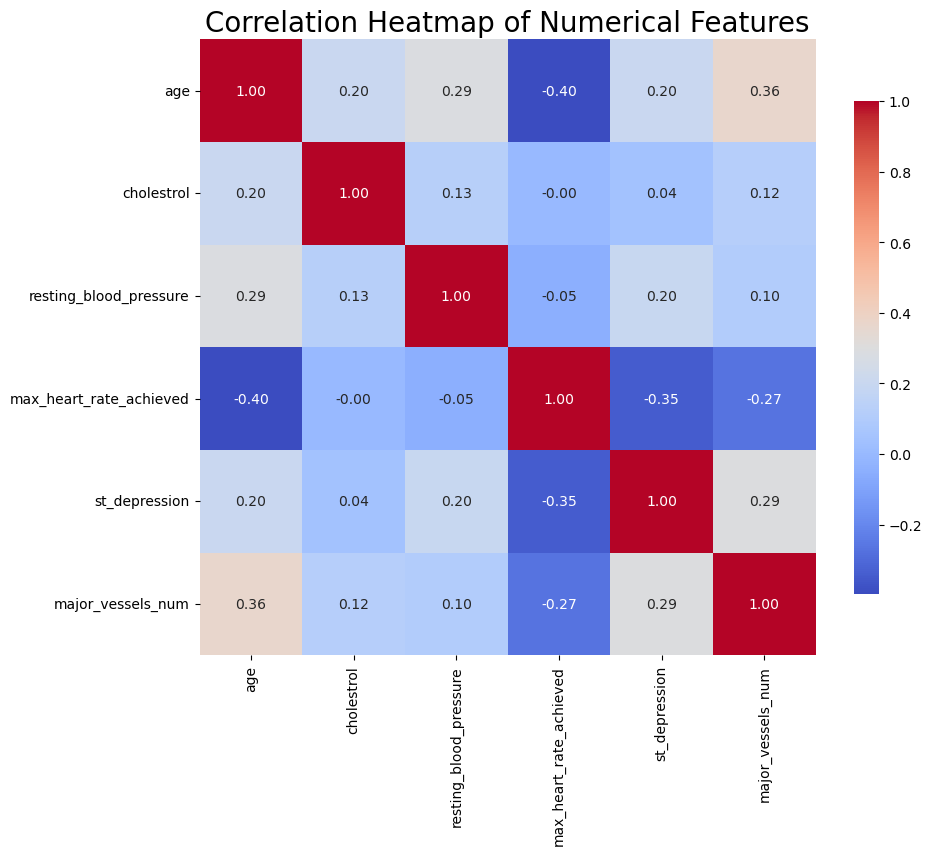

In [22]:
corr_matrix = df[num_feats].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=20)
plt.show()

##### We can observe that :
####  - All these features are positevly and linearly related to the age except max heart rate achieved and ST depression is weak.
####  - Low ST_ depression indicates a heart disease regardless age.

## Categorical Features

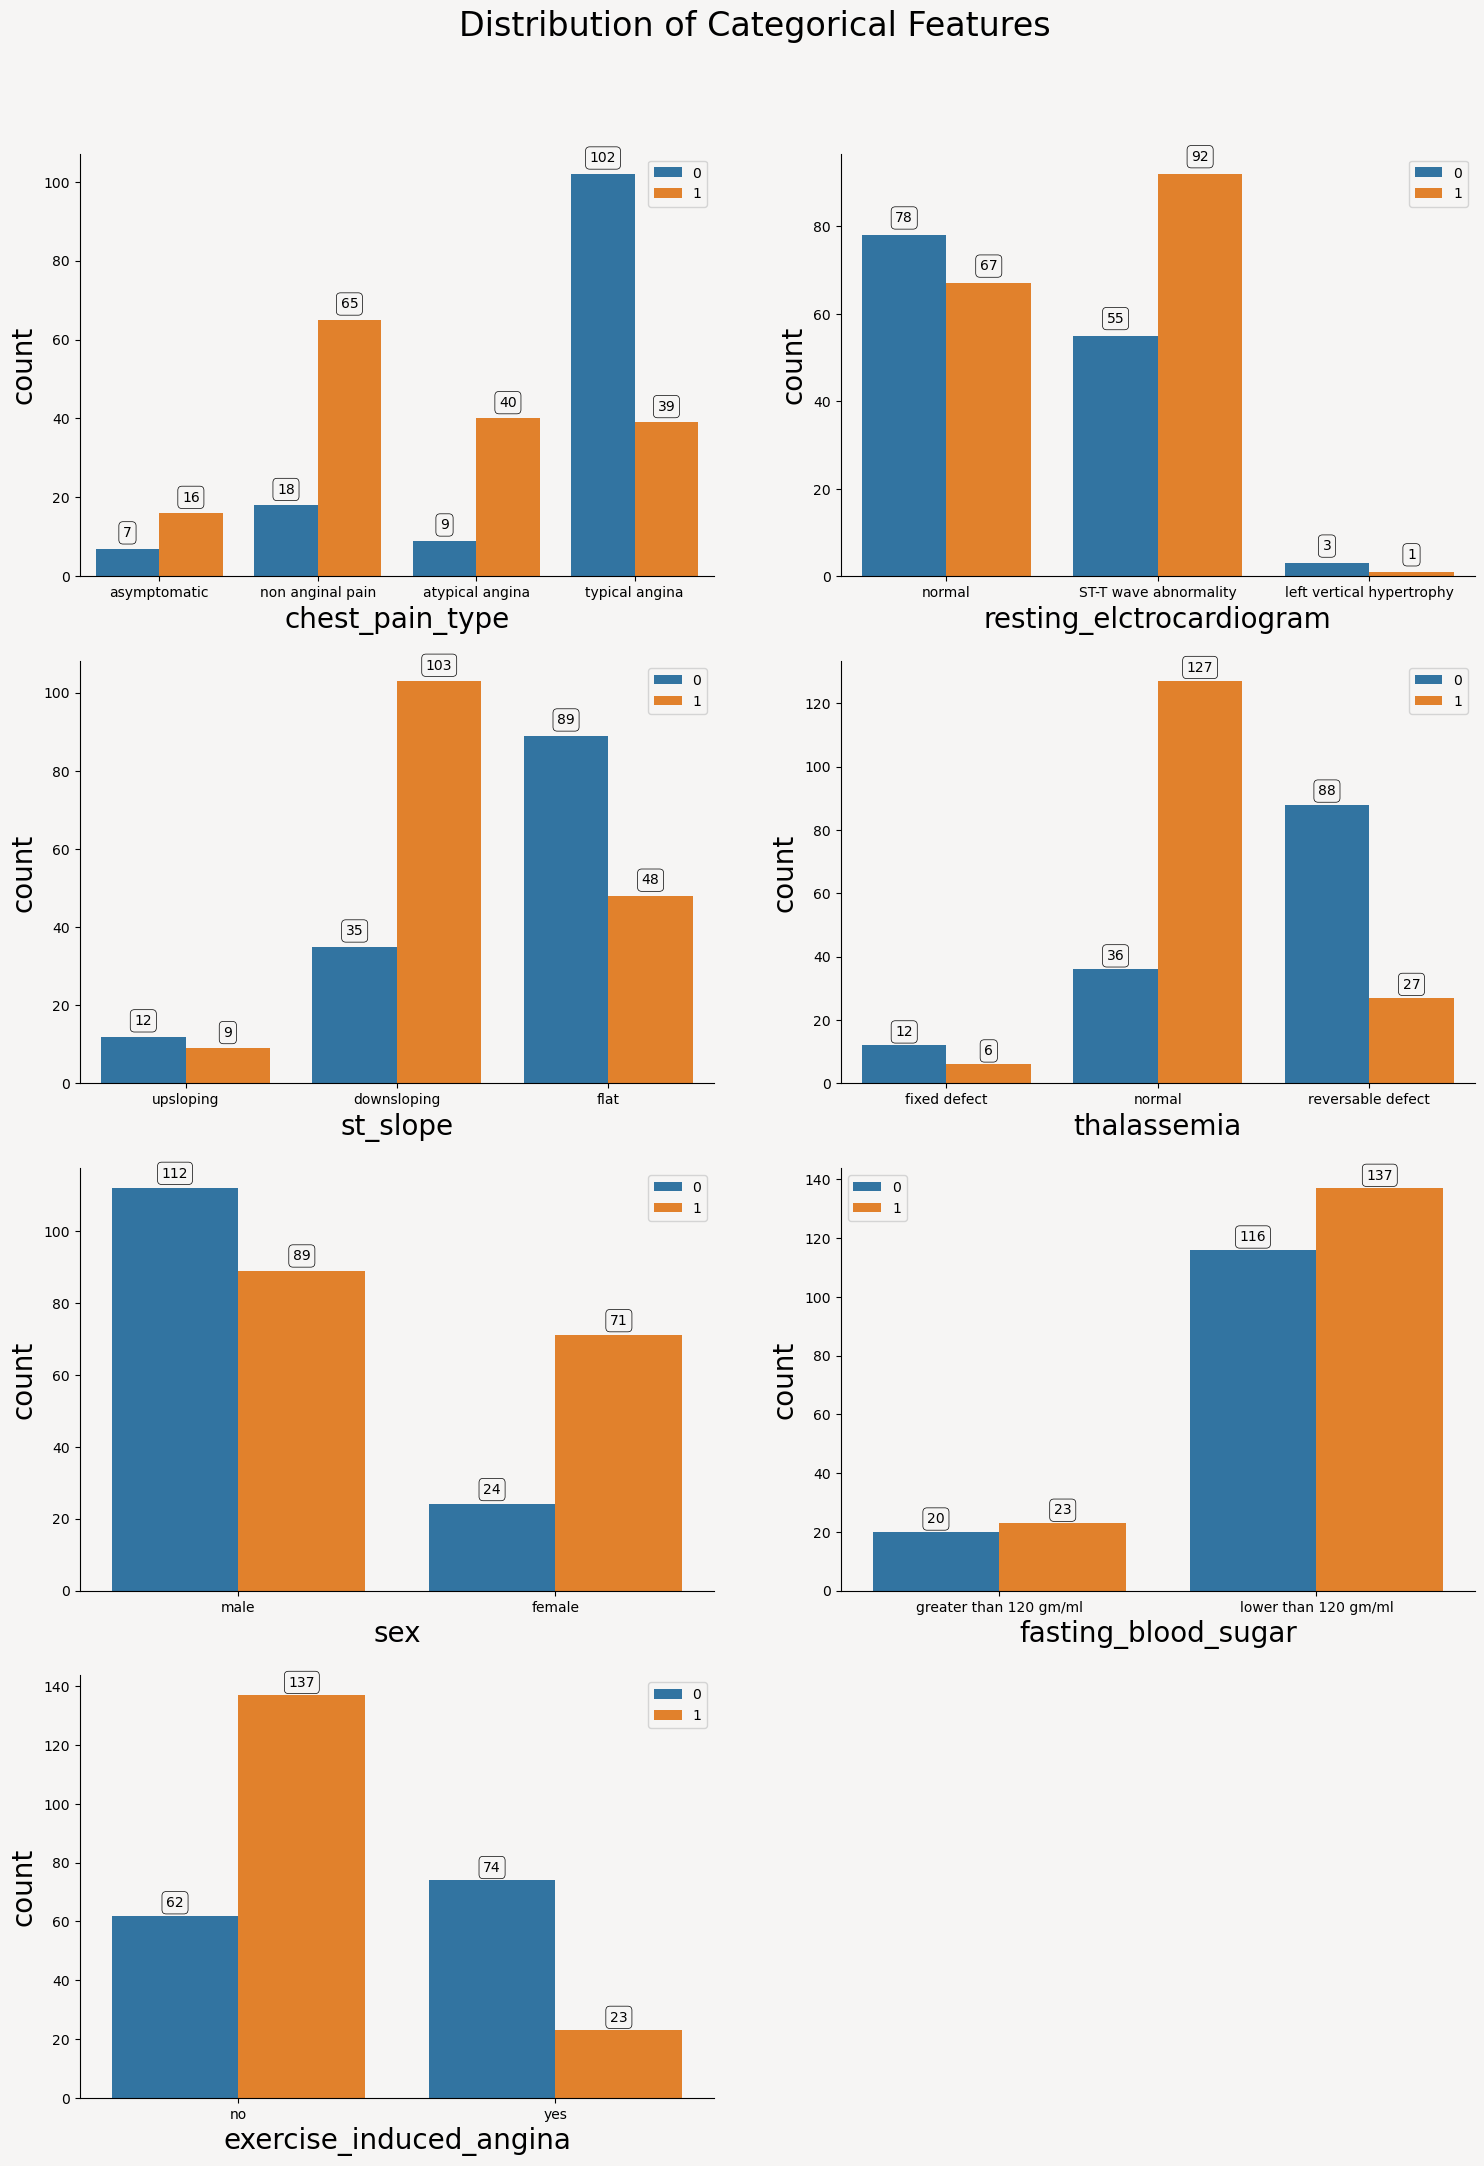

In [23]:
def count_plot(data, cat_feats):    
    L = len(cat_feats)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(18, 24), facecolor='#F6F5F4')    
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in cat_feats:
        plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
        ax = sns.countplot(data=df, x=col, hue="target")
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("count", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False) 
        plt.legend(facecolor='#F6F5F4')
        
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                  bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        
        i = i +1

    plt.suptitle('Distribution of Categorical Features' ,fontsize = 24)
    return 0

count_plot(df, cat_feats[0:-1]);

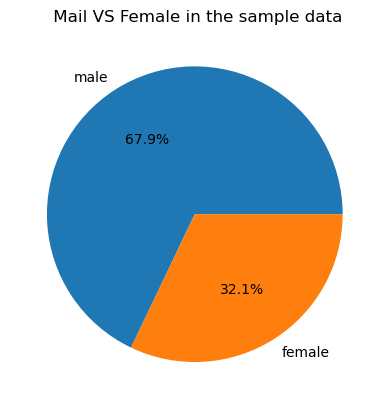

In [24]:
counter=df['sex'].value_counts()
plt.title(' Mail VS Female in the sample data')
plt.pie(counter, labels=df['sex'].unique(),autopct='%1.1f%%')
plt.show()

### Observations:
- Patients who experinced atypical angina or non_angina chest pain are more likely to have heart disease. 
- Most patients have a downsloping or flat ST_ slope, and downsloping ST_slopes are a string indication that the patient might have a heart disease.
- Patients who have thalassemia defects(reversed or fixed) are less likely to have heart disease that those with normal.
- Patients with exercise induced angina had no heart conditions. Whereas the patients who did not experience exercise induced angina were diagnosed with heart condition.
- More patients in the sample data are males.

##### Data splitting

In [25]:
categorical =cat_feats
le= LabelEncoder()
data_encoded=df.copy()
for col in categorical:
    data_encoded[col] =le.fit_transform(df[col])
    

In [51]:
X= data_encoded.iloc[:, :-1]
y= data_encoded.iloc[:, -1]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training the model

In [54]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [56]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='accuracy', verbose=1)

In [58]:
best_model = model.best_estimator_

y_predict= best_model.predict(X_test)

In [60]:
acc=accuracy_score(y_predict, y_test)
print(f"Test Accuracy: {acc}")

Test Accuracy: 0.8666666666666667


In [61]:
import pickle

with open('Iris_Model.pkl', 'wb') as file:
    pickle.dump(model, file)